# DBSCAN Clustering  |  Unsupervised Learning 

# Dataset | Wholesale Customers

### Importing Libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Importing Dataset

In [64]:
df = pd.read_csv('wholesale customers.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


### Exploring Data

In [66]:
# Relationships between Items
df.drop(['Channel', 'Region'], axis=1).corr().round(3) 

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000,0.101,-0.012,0.346,-0.102,0.245
Milk,0.101,1.000,0.728,0.124,0.662,0.406
Grocery,-0.012,0.728,1.000,-0.040,0.925,0.205
Frozen,0.346,0.124,-0.040,1.000,-0.132,0.391
Detergents_Paper,-0.102,0.662,0.925,-0.132,1.000,0.069
Delicassen,0.245,0.406,0.205,0.391,0.069,1.000


<AxesSubplot:>

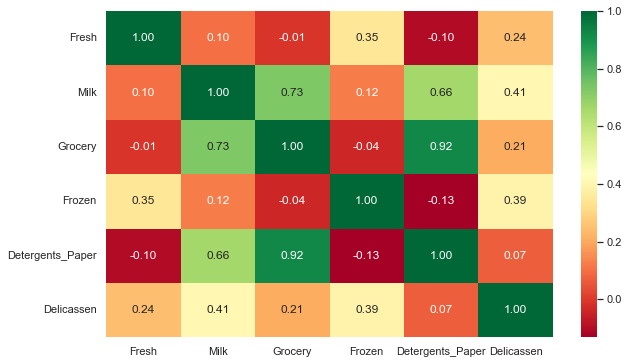

In [67]:
# Relationships between Items
plt.figure(figsize=[10,6])
sns.heatmap(df.drop(['Channel', 'Region'], axis=1).corr(), annot=True, fmt='0.2f', cmap="RdYlGn")

<Figure size 432x288 with 0 Axes>

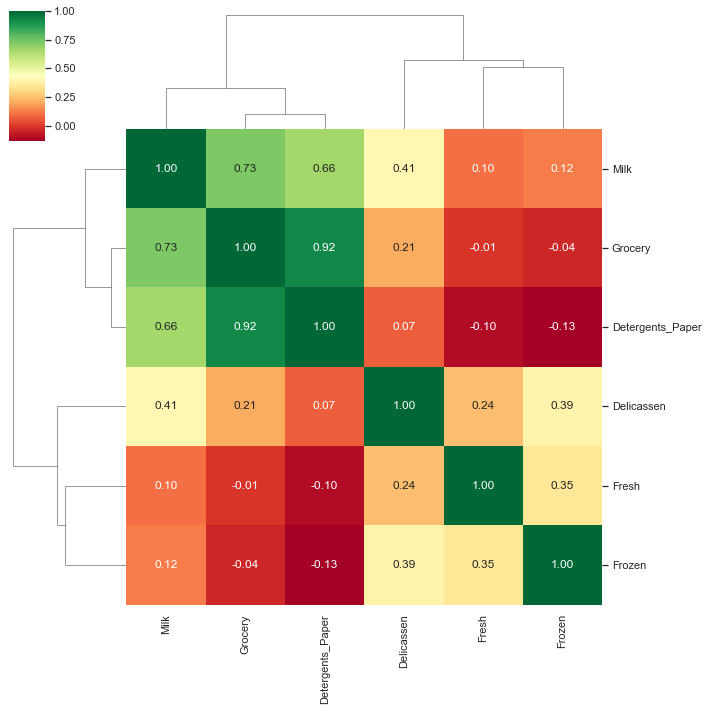

In [68]:
# clustring to Items
plt.figure(figsize=[6,4])
sns.clustermap(df.drop(['Channel', 'Region'], axis=1).corr(), annot=True, fmt='0.2f', cmap="RdYlGn")

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

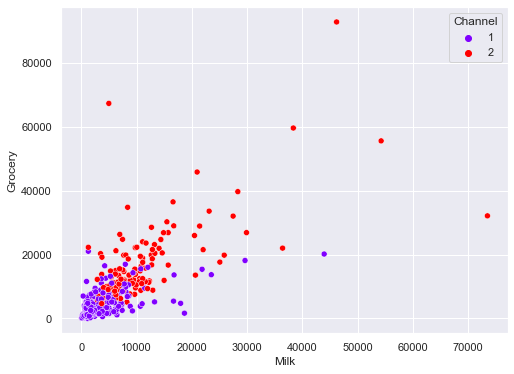

In [69]:
# Relationships between Milk and Grocery and Classification based on Channel 
plt.figure(figsize=[8,6])
sns.scatterplot(x='Milk', y='Grocery', data=df,hue='Channel', palette='rainbow')

### Preprocessing Data

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
sc =StandardScaler()

In [72]:
scaled_X = sc.fit_transform(df)

In [73]:
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

### Finding the Optimal Value For Epsilon

In [74]:
from sklearn.cluster import DBSCAN

In [75]:
noise_percent = []
for i in np.linspace(.001, 3, 50):
    dbscan = DBSCAN(eps=i)
    dbscan.fit(scaled_X)
    noise = 100 * np.sum(dbscan.labels_ == -1)/ len(dbscan.labels_)
    noise_percent.append(noise)
noise_percent

[100.0,
 100.0,
 100.0,
 98.86363636363636,
 91.36363636363636,
 82.5,
 77.04545454545455,
 70.0,
 62.27272727272727,
 52.04545454545455,
 42.27272727272727,
 34.31818181818182,
 30.90909090909091,
 27.5,
 23.863636363636363,
 22.954545454545453,
 20.227272727272727,
 18.181818181818183,
 16.136363636363637,
 14.772727272727273,
 13.181818181818182,
 12.727272727272727,
 11.590909090909092,
 10.909090909090908,
 10.681818181818182,
 9.545454545454545,
 8.863636363636363,
 7.7272727272727275,
 6.590909090909091,
 5.681818181818182,
 5.454545454545454,
 5.454545454545454,
 4.090909090909091,
 3.8636363636363638,
 3.6363636363636362,
 3.6363636363636362,
 3.409090909090909,
 3.1818181818181817,
 3.1818181818181817,
 3.1818181818181817,
 3.1818181818181817,
 3.1818181818181817,
 2.9545454545454546,
 2.727272727272727,
 2.727272727272727,
 2.727272727272727,
 2.727272727272727,
 2.727272727272727,
 2.727272727272727,
 2.727272727272727]

<AxesSubplot:>

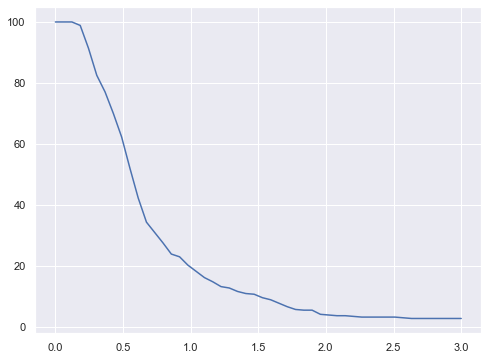

In [76]:
plt.figure(figsize=[8,6])
sns.lineplot(x=np.linspace(.001, 3, 50), y=noise_percent)

### Model Training & Prediction

In [77]:
model = DBSCAN(eps=2)

In [78]:
model.fit(scaled_X)

DBSCAN(eps=2)

In [79]:
model.labels_

array([ 0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  1, -1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0, -1,  0,  0,  1,
        1,  0,  0,  1,  1,  0,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  1,  1,  0,  0,
        0,  1,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,
        0,  0,  1,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        1,  0,  1,  0,  1,  0,  1, -1,  1,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  0,  1,  1

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

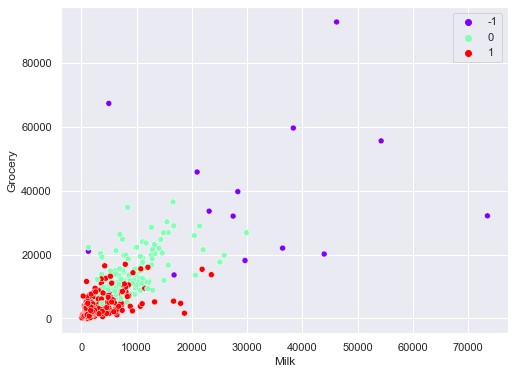

In [80]:
plt.figure(figsize=[8,6])
sns.scatterplot(x='Milk', y='Grocery',data=df, hue= model.labels_, palette='rainbow')

In [81]:
# Add New Column Clusters to Data 
df['clusters']= model.labels_
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
5,2,3,9413,8259,5126,666,1795,1451,0
6,2,3,12126,3199,6975,480,3140,545,0
7,2,3,7579,4956,9426,1669,3321,2566,0
8,1,3,5963,3648,6192,425,1716,750,1
9,2,3,6006,11093,18881,1159,7425,2098,0


In [82]:
#Select Outliers from the Data
df[df['clusters']==-1]    

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
23,2,3,26373,36423,22019,5154,4337,16523,-1
47,2,3,44466,54259,55571,7782,24171,6465,-1
61,2,3,35942,38369,59598,3254,26701,2017,-1
65,2,3,85,20959,45828,36,24231,1423,-1
71,1,3,18291,1266,21042,5373,4173,14472,-1
85,2,3,16117,46197,92780,1026,40827,2944,-1
86,2,3,22925,73498,32114,987,20070,903,-1
87,1,3,43265,5025,8117,6312,1579,14351,-1
92,2,3,9198,27472,32034,3232,18906,5130,-1
93,1,3,11314,3090,2062,35009,71,2698,-1


## Thanks